<a href="https://colab.research.google.com/github/ElenaMakarova91/skillfactory_rds_module_2/blob/main/EDA_module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Разведывательный анализ данных (EDA)

*цели и задачи проекта:*
* 1. Сформулировать предположения и гипотезы для дальнейшего построения модели.
* 2. Проверить качество данных и очистить их, если это необходимо.
* 3. Определиться с параметрами модели.

In [401]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [402]:
from google.colab import drive
drive.mount('/content/drive')

stud= pd.read_csv('./drive/My Drive/Colab Notebooks/skillfactory/Project2_analis/stud_math.xls')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Описание датасета
Посмотрим на переменные, которые содержит датасет:

* **1 school** — аббревиатура школы, в которой учится ученик

* **2 sex** — пол ученика ('F' - женский, 'M' - мужской)

* **3 age** — возраст ученика (от 15 до 22)

* **4 address** — тип адреса ученика ('U' - городской, 'R' - за городом)

* **5 famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

* **6 Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

* **7 Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

* **8 Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

* **9 Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

* **10 Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

* **11 reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

* **12 guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

* **13 traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

* **14 studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

* **15 failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

* **16 schoolsup** — дополнительная образовательная поддержка (yes или no)

* **17 famsup** — семейная образовательная поддержка (yes или no)

* **18 paid** — дополнительные платные занятия по математике (yes или no)

* **19 activities** — дополнительные внеучебные занятия (yes или no)

* **20 nursery** — посещал детский сад (yes или no)

* **21 higher** — хочет получить высшее образование (yes или no)

* **22 internet** — наличие интернета дома (yes или no)

* **23 romantic** — в романтических отношениях (yes или no)

* **24 famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

* **25 freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

* **26 goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

* **27 health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

* **28 absences** — количество пропущенных занятий

* **29 score** — баллы по госэкзамену по математике

In [403]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [404]:
# посмотрим на размеры датасета
stud.shape


(395, 30)


Датасет содержит:

* 395 строк (учеников);
* 30 признаков, в т.ч. целевой признак - score - оценка по математике;числовых признаков - 13; строковых - 17.


In [405]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


**Найдем количество уникальных значений в столбцах датасета**

In [406]:

object_columns = [c for c in stud.columns if stud[c].dtypes == 'object']
for column in object_columns:
    unique = stud[column].unique()
    print('Количество уникальных значений для столбца',
          column, '-', len(unique), unique)

Количество уникальных значений для столбца school - 2 ['GP' 'MS']
Количество уникальных значений для столбца sex - 2 ['F' 'M']
Количество уникальных значений для столбца address - 3 ['U' nan 'R']
Количество уникальных значений для столбца famsize - 3 [nan 'GT3' 'LE3']
Количество уникальных значений для столбца Pstatus - 3 ['A' nan 'T']
Количество уникальных значений для столбца Mjob - 6 ['at_home' 'health' 'other' 'services' 'teacher' nan]
Количество уникальных значений для столбца Fjob - 6 ['teacher' 'other' nan 'health' 'services' 'at_home']
Количество уникальных значений для столбца reason - 5 ['course' 'other' 'home' 'reputation' nan]
Количество уникальных значений для столбца guardian - 4 ['mother' 'father' 'other' nan]
Количество уникальных значений для столбца schoolsup - 3 ['yes' 'no' nan]
Количество уникальных значений для столбца famsup - 3 ['no' 'yes' nan]
Количество уникальных значений для столбца paid - 3 ['no' nan 'yes']
Количество уникальных значений для столбца activiti

**количество нулевых значений**

In [407]:
stud.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

проанализируем каждый показатель. Необходимо сделать что-то с пустыми значениями.У первых трех показателей нет пропусков. 

Посмотрим на корреляцию числовых признаков в наших данных:

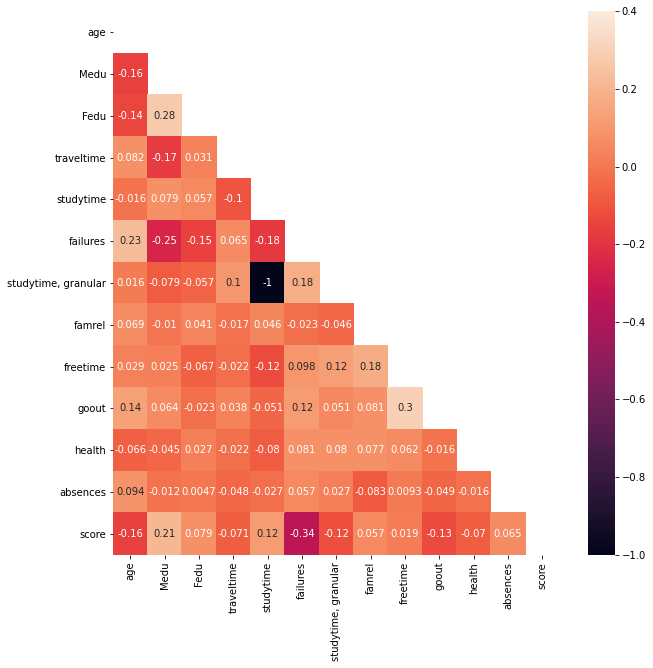

In [408]:
fig, ax = plt.subplots(figsize=(10, 10))
corr = stud.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True,  fmt='.2g', mask=matrix,
            vmin=-1, vmax=0.4)

In [409]:
#Столбец практически дублирует другой, studytime. Удаляем
stud.drop(['studytime, granular'], inplace = True, axis = 1)


столбец **score является целевым**. 


In [410]:
# сохраним строки с пустыми значениями из score
# удаляем их из основного датасета
stud_empty_score = stud[stud.score.isna()]
stud = stud[stud.score.isna() == False]
# проверям пустые значения после удаления
stud.score.isna().sum()

0

In [411]:
stud=stud.drop(stud['Fedu'][stud.Fedu == 40].index) 


In [412]:
stud=stud.drop(stud['famrel'][stud.famrel == -1].index)

In [413]:
stud=stud.drop(stud['absences'][stud.absences > 30].index)

In [414]:
stud = stud.drop(stud['age'][stud.age > 21].index)

In [415]:
stud = stud[stud.Medu.isna() == False]

In [416]:
# посмотрим какой теперь размер датасета
stud.shape

(376, 29)

In [417]:
stud.isnull().sum()

school         0
sex            0
age            0
address       14
famsize       27
Pstatus       39
Medu           0
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      30
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        36
paid          39
activities    14
nursery       15
higher        20
internet      33
romantic      30
famrel        26
freetime       8
goout          6
health        15
absences      11
score          0
dtype: int64

**Функция проверяет наличие выбросов через межквартильный размах**

In [418]:
def emissions(stud, column):
    emissions1=emissions2=0
    
    quan1 = stud[column].quantile(q=0.25, interpolation='midpoint')
    quan3 = stud[column].quantile(q=0.75, interpolation='midpoint')
    IQR = round(quan3 - quan1, 1)
    gran1 = quan1 - 1.5 * IQR
    gran2 = quan3 + 1.5 * IQR
    if (stud[column].min() < gran1) or (stud[column].max() > gran2):
        print('нижний квартиль: {},'.format(quan1), 'верхний квартиль: {},'.format(quan3)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=quan1 - 1.5*IQR, l=quan3 + 1.5*IQR))
       
    
    else:
        print('нижний квартиль: {},'.format(quan1), 'верхний квартиль: {},'.format(quan3)
      , "IQR: {}, ".format(IQR),'выбросов нет')
        
    return



**Функция визуализирует категориальную переменну**

In [419]:
def graf_cat_perem(column): 
          #   Функция визуализирует категориальную переменную
            fig, (ax1, ax2, ax) = plt.subplots(nrows=1, ncols=3,figsize=(12, 6))

            ax1.hist(stud[column])
            ax1.set_title(f'Гистограмма {column}')
            ax1.set_xlabel(f'значения {column}')
            ax1.set_ylabel('количество значений')

            sns.boxplot(column, "score", data=stud, ax=ax2)

            ax2.set_title(f'Зависимость баллов от {column}')
            ax2.set_xlabel(f'значения {column}')
            ax2.set_ylabel('баллы')

            sns.swarmplot(column, "score", data=stud, ax=ax)

            ax.set_title(f'Зависимость баллов от {column}')
            ax.set_xlabel(f'значения {column}')
            ax.set_ylabel('баллы')

            plt.show()

Отображение графика boxplot и countplot для анализа категориальных признаков

In [420]:

def boxplot_distr(column, small=False):

    if small:
        plt.figure(figsize=(3, 1))
    else:
        plt.figure(figsize=(9, 3))
    sns.boxplot(x=column, y='score', data=stud)
    ax2 = plt.twinx()
    g = sns.countplot(x=column, data=stud)
    for bar in g.patches:
        bar.set_width(0.05)
        x = bar.get_x()
        x -= 0.1
        bar.set_x(x)
    plt.show()
    plt.close()

**Функция визуализирует числовую переменную**

In [421]:
def graf_chisl_perem(column):
        #  Функция визуализирует числовую переменную
            fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))

            ax1.hist(stud[column], bins=77)
            ax1.set_title(f'Гистограмма {column}')
            ax1.set_xlabel(f'значения {column}')
            ax1.set_ylabel('количество значений')

            sns.swarmplot(x=column, y='score', data=stud, ax=ax2)

            ax2.set_title(f'Зависимость баллов от {column}')
            ax2.set_xlabel(f'значения {column}')
            ax2.set_ylabel('баллы')

            plt.show

**Функция анализа столбца**

In [422]:
# Функция, которая для выбранного столбца выводит:
# -тип значений
# -кол-во пустых строк
# -кол-во строк категории
# для числовых :+ распределение и гистограмму
    
def analis_column(stud, column):
    column_type_numeric = False
    
    # печатаем тип колонки
    if stud[column].dtype == "O":
        print('Признак', column, 'имеет категориальные значения.')
        print(stud[column].describe())
        print('Распределение значений в %:')
        print(pd.DataFrame(stud[column].value_counts(1)))
        print('Средние значения баллов по значениям:')
        print(stud[stud.score >= 20].groupby(column)['score'].mean())
        
        
    elif stud[column].dtype == "int64" or stud[column].dtype == "float64":
        column_type_numeric = True        
        print('Признак', column, 'имеет числовые значения.')
        print()
        print('Распределение значений признака:')
        print(stud[column].describe())
        stud[column].hist()
        emissions(stud, column)
        
    else:
        print(('Признак', column, 'имеет тип', stud[column].dtype)/n)
    
    print()
    
    # печатаем количество пустых строк
    print('Количество пустых строк:', stud[column].isna().sum())
    
    print()
    
    # печатаем значения признака
    print('Значения кол-во признака:')
    print(stud[column].value_counts())
    
    print()
    
  
      
        
         

# school

In [423]:
analis_column(stud, 'school') # содержит два значения, пустых значений нет


Признак school имеет категориальные значения.
count     376
unique      2
top        GP
freq      332
Name: school, dtype: object
Распределение значений в %:
      school
GP  0.882979
MS  0.117021
Средние значения баллов по значениям:
school
GP    58.55
MS    54.50
Name: score, dtype: float64

Количество пустых строк: 0

Значения кол-во признака:
GP    332
MS     44
Name: school, dtype: int64



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


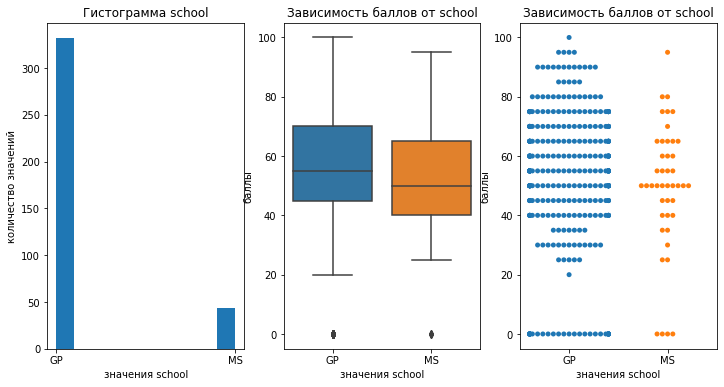

In [424]:
graf_cat_perem('school')

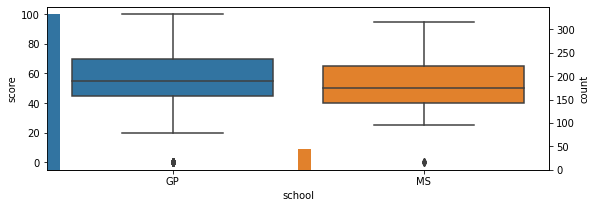

In [425]:
boxplot_distr('school', small=False)

# sex

In [426]:
analis_column(stud, 'sex') # содержит два значения, пустых значений нет, выбросов нет.

Признак sex имеет категориальные значения.
count     376
unique      2
top         F
freq      196
Name: sex, dtype: object
Распределение значений в %:
        sex
F  0.521277
M  0.478723
Средние значения баллов по значениям:
sex
F    56.379310
M    59.849398
Name: score, dtype: float64

Количество пустых строк: 0

Значения кол-во признака:
F    196
M    180
Name: sex, dtype: int64



In [427]:
display(pd.DataFrame(stud.sex.value_counts()))


,sex
F,196
M,180


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to dec

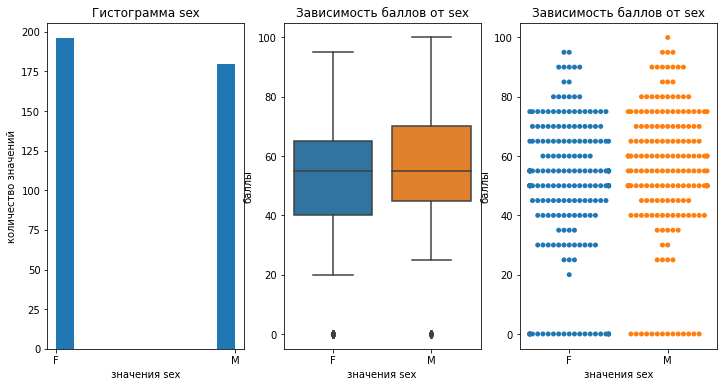

In [428]:
graf_cat_perem('sex')

# age

Признак age имеет числовые значения.

Распределение значений признака:
count    376.000000
mean      16.643617
std        1.224467
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64
нижний квартиль: 16.0, верхний квартиль: 18.0, IQR: 2.0,  выбросов нет

Количество пустых строк: 0

Значения кол-во признака:
16    98
17    97
15    81
18    78
19    19
20     2
21     1
Name: age, dtype: int64



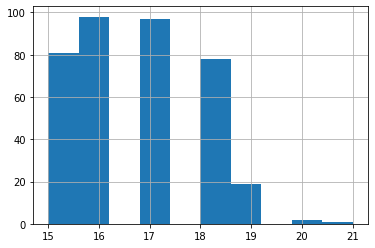

In [429]:
analis_column(stud, 'age')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


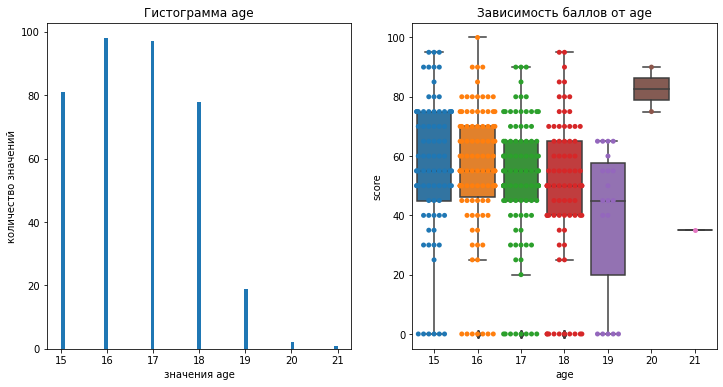

In [430]:
graf_chisl_perem('age')    #  Функция визуализирует числовую переменную
sns.boxplot(x='age',y='score',data=stud)


нижний квартиль: 16.0, верхний квартиль: 18.0, IQR: 2.0,  выбросов нет


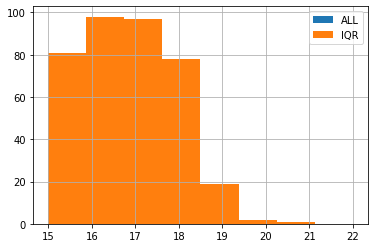

In [431]:
#Анализируем выбросы и строим гистограмму
emissions(stud, 'age')    # Функция проверяет наличие выбросов через межквартильный размах
stud.age.hist(bins = 8, range = (15, 22), label = 'ALL')
quan1 = stud['age'].quantile(q=0.25, interpolation='midpoint')
quan3 = stud['age'].quantile(q=0.75, interpolation='midpoint')
IQR = round(quan3 - quan1, 1)
stud.age.loc[stud.age.between(quan1 - 1.5*IQR, quan3 + 1.5*IQR)].hist(bins = 8, range = (15, 22), label = 'IQR')

plt.legend()

Вывод: Возраст 22 года выходит за границы, является "выбросом"

Выброс 22 и взрослый 21 у нас по одному, давайте удалим их.

In [432]:
stud = stud.drop(stud['age'][stud.age > 21].index) # перенесем все удаления в начало программы

# address


In [433]:
analis_column(stud, 'address')

Признак address имеет категориальные значения.
count     362
unique      2
top         U
freq      282
Name: address, dtype: object
Распределение значений в %:
    address
U  0.779006
R  0.220994
Средние значения баллов по значениям:
address
R    53.500000
U    59.085603
Name: score, dtype: float64

Количество пустых строк: 14

Значения кол-во признака:
U    282
R     80
Name: address, dtype: int64



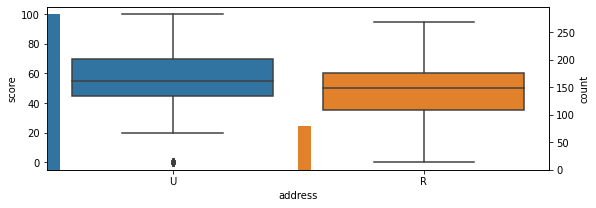

In [434]:
boxplot_distr('address', small=False)


# famsize

In [435]:
analis_column(stud, 'famsize')

Признак famsize имеет категориальные значения.
count     349
unique      2
top       GT3
freq      245
Name: famsize, dtype: object
Распределение значений в %:
      famsize
GT3  0.702006
LE3  0.297994
Средние значения баллов по значениям:
famsize
GT3    57.831050
LE3    59.123711
Name: score, dtype: float64

Количество пустых строк: 27

Значения кол-во признака:
GT3    245
LE3    104
Name: famsize, dtype: int64



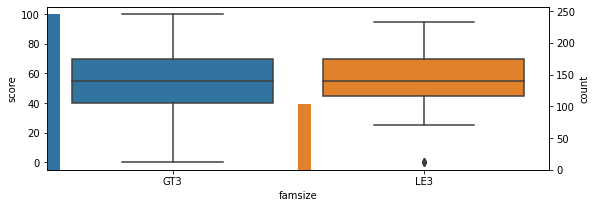

In [436]:
boxplot_distr('famsize', small=False)

# Pstatus

In [437]:
analis_column(stud, 'Pstatus')

Признак Pstatus имеет категориальные значения.
count     337
unique      2
top         T
freq      303
Name: Pstatus, dtype: object
Распределение значений в %:
   Pstatus
T  0.89911
A  0.10089
Средние значения баллов по значениям:
Pstatus
A    59.218750
T    57.573529
Name: score, dtype: float64

Количество пустых строк: 39

Значения кол-во признака:
T    303
A     34
Name: Pstatus, dtype: int64



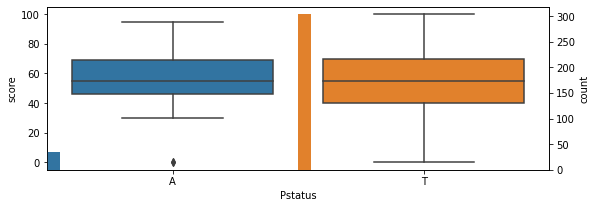

In [438]:
boxplot_distr('Pstatus', small=False)

# Medu

Признак Medu имеет числовые значения.

Распределение значений признака:
count    376.000000
mean       2.771277
std        1.103123
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
нижний квартиль: 2.0, верхний квартиль: 4.0, IQR: 2.0,  выбросов нет

Количество пустых строк: 0

Значения кол-во признака:
4.0    130
2.0     95
3.0     92
1.0     56
0.0      3
Name: Medu, dtype: int64



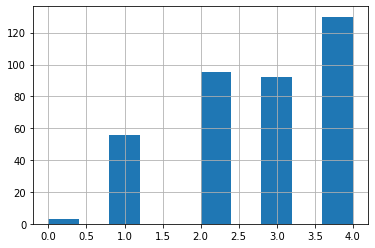

In [439]:
analis_column(stud, 'Medu')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


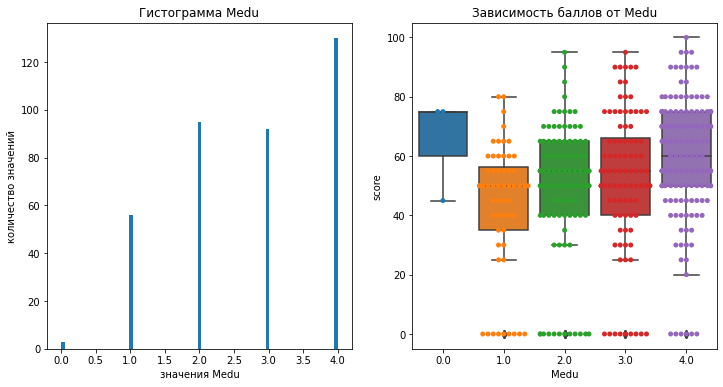

In [440]:
graf_chisl_perem('Medu')
sns.boxplot(x='Medu',y='score',data=stud)

# Fedu

Признак Fedu имеет числовые значения.

Распределение значений признака:
count    352.000000
mean       2.528409
std        1.093514
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64
нижний квартиль: 2.0, верхний квартиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].

Количество пустых строк: 24

Значения кол-во признака:
2.0    101
3.0     89
4.0     87
1.0     73
0.0      2
Name: Fedu, dtype: int64



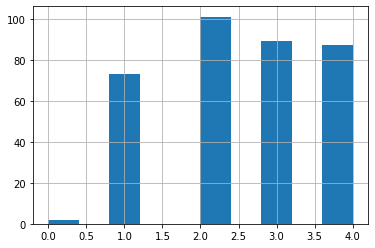

In [441]:
analis_column(stud, 'Fedu')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


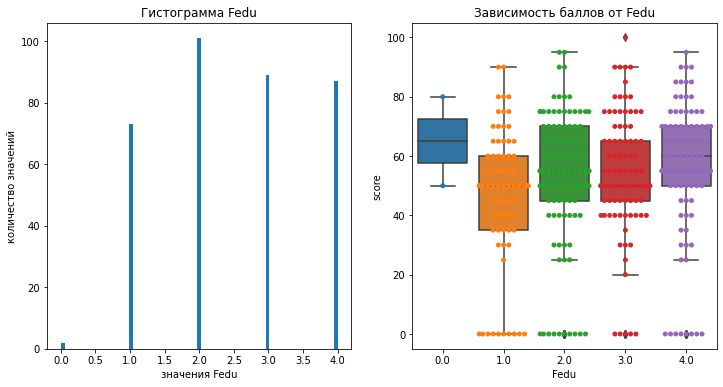

In [442]:
graf_chisl_perem('Fedu')
sns.boxplot(x='Fedu',y='score',data=stud)

в Fedu Границы выбросов: [0.5, 4.5]    
есть один явный выброс = 40                
Fedu имеет значения только 0,1,2,3,4,40.             
у двух строк = 0.               
Количество пусты строк 24. 

# Mjob

In [443]:
analis_column(stud, 'Mjob')

Признак Mjob имеет категориальные значения.
count       357
unique        5
top       other
freq        121
Name: Mjob, dtype: object
Распределение значений в %:
              Mjob
other     0.338936
services  0.257703
at_home   0.162465
teacher   0.151261
health    0.089636
Средние значения баллов по значениям:
Mjob
at_home     54.081633
health      64.666667
other       55.136364
services    60.059524
teacher     59.900000
Name: score, dtype: float64

Количество пустых строк: 19

Значения кол-во признака:
other       121
services     92
at_home      58
teacher      54
health       32
Name: Mjob, dtype: int64



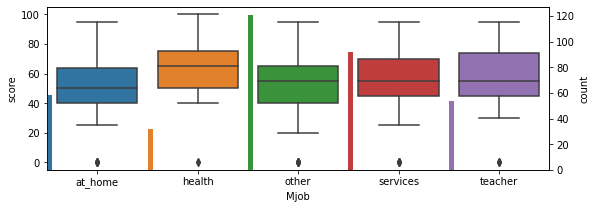

In [444]:
boxplot_distr('Mjob', small=False)



Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

# 	Fjob

In [445]:
analis_column(stud, 'Fjob')

Признак Fjob имеет категориальные значения.
count       340
unique        5
top       other
freq        190
Name: Fjob, dtype: object
Распределение значений в %:
              Fjob
other     0.558824
services  0.267647
teacher   0.082353
at_home   0.047059
health    0.044118
Средние значения баллов по значениям:
Fjob
at_home     59.285714
health      55.666667
other       56.918605
services    57.073171
teacher     66.000000
Name: score, dtype: float64

Количество пустых строк: 36

Значения кол-во признака:
other       190
services     91
teacher      28
at_home      16
health       15
Name: Fjob, dtype: int64



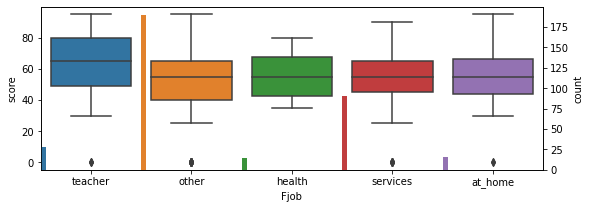

In [446]:
boxplot_distr('Fjob', small=False)

# 	reason

In [447]:
analis_column(stud, 'reason')

Признак reason имеет категориальные значения.
count        359
unique         4
top       course
freq         134
Name: reason, dtype: object
Распределение значений в %:
              reason
course      0.373259
home        0.270195
reputation  0.267409
other       0.089136
Средние значения баллов по значениям:
reason
course        56.610169
home          58.823529
other         57.258065
reputation    59.670330
Name: score, dtype: float64

Количество пустых строк: 17

Значения кол-во признака:
course        134
home           97
reputation     96
other          32
Name: reason, dtype: int64



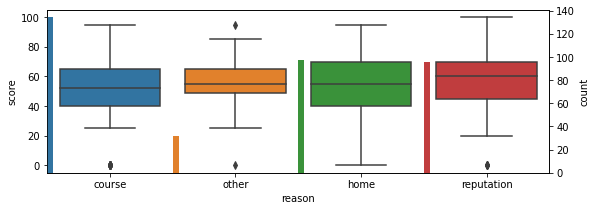

In [448]:
boxplot_distr('reason', small=False)

# guardian

In [449]:
analis_column(stud, 'guardian')

Признак guardian имеет категориальные значения.
count        346
unique         3
top       mother
freq         241
Name: guardian, dtype: object
Распределение значений в %:
        guardian
mother  0.696532
father  0.239884
other   0.063584
Средние значения баллов по значениям:
guardian
father    59.276316
mother    58.211009
other     55.555556
Name: score, dtype: float64

Количество пустых строк: 30

Значения кол-во признака:
mother    241
father     83
other      22
Name: guardian, dtype: int64



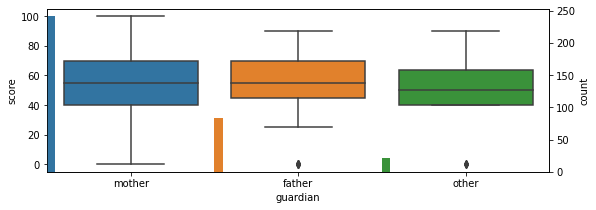

In [450]:
boxplot_distr('guardian', small=False)

# traveltime

Признак traveltime имеет числовые значения.

Распределение значений признака:
count    348.000000
mean       1.439655
std        0.695255
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
нижний квартиль: 1.0, верхний квартиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].

Количество пустых строк: 28

Значения кол-во признака:
1.0    229
2.0     92
3.0     20
4.0      7
Name: traveltime, dtype: int64



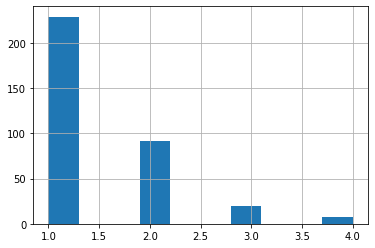

In [451]:
analis_column(stud, 'traveltime')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


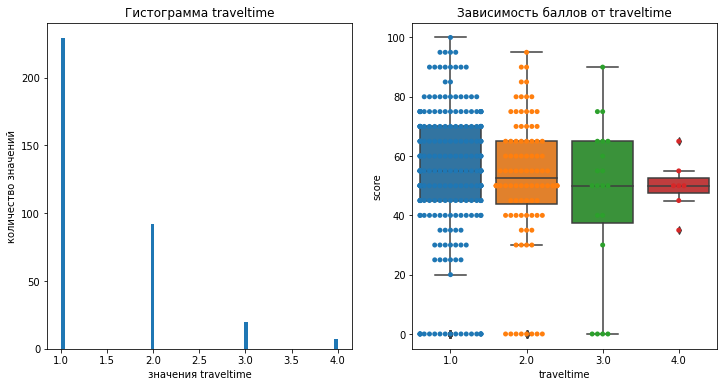

In [452]:
graf_chisl_perem('traveltime')
sns.boxplot(x='traveltime',y='score',data=stud)

# studytime

Признак studytime имеет числовые значения.

Распределение значений признака:
count    369.000000
mean       2.043360
std        0.852277
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
нижний квартиль: 1.0, верхний квартиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].

Количество пустых строк: 7

Значения кол-во признака:
2.0    182
1.0     99
3.0     61
4.0     27
Name: studytime, dtype: int64



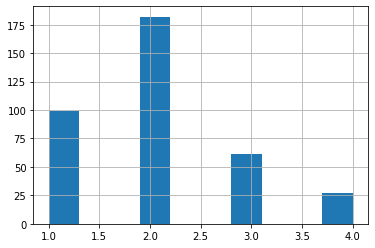

In [453]:
analis_column(stud, 'studytime')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


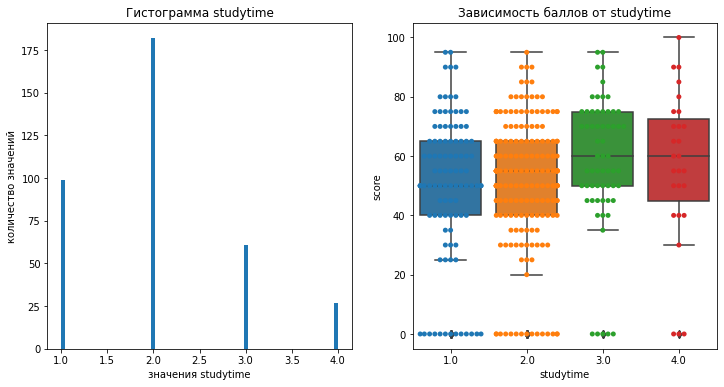

In [454]:
graf_chisl_perem('studytime')
sns.boxplot(x='studytime',y='score',data=stud)

# failures

Признак failures имеет числовые значения.

Распределение значений признака:
count    354.000000
mean       0.310734
std        0.713725
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
нижний квартиль: 0.0, верхний квартиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].

Количество пустых строк: 22

Значения кол-во признака:
0.0    283
1.0     45
2.0     13
3.0     13
Name: failures, dtype: int64



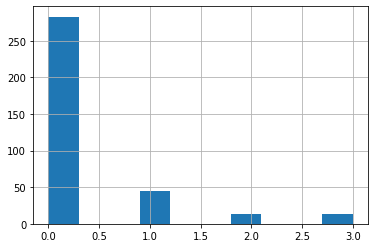

In [455]:
analis_column(stud, 'failures')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


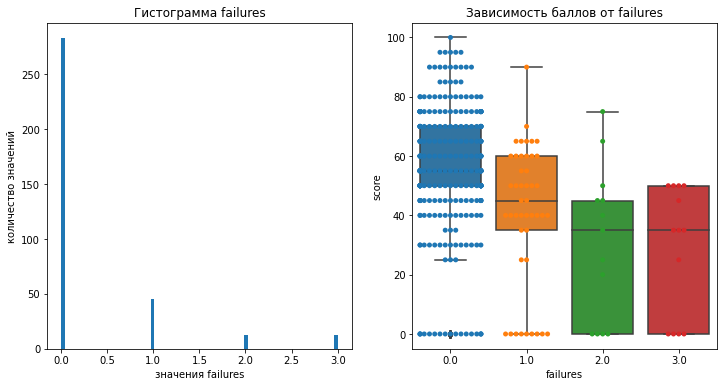

In [456]:
graf_chisl_perem('failures')
sns.boxplot(x='failures',y='score',data=stud)

# schoolsup

In [457]:
analis_column(stud, 'schoolsup')

Признак schoolsup имеет категориальные значения.
count     367
unique      2
top        no
freq      321
Name: schoolsup, dtype: object
Распределение значений в %:
     schoolsup
no    0.874659
yes   0.125341
Средние значения баллов по значениям:
schoolsup
no     60.034965
yes    47.444444
Name: score, dtype: float64

Количество пустых строк: 9

Значения кол-во признака:
no     321
yes     46
Name: schoolsup, dtype: int64



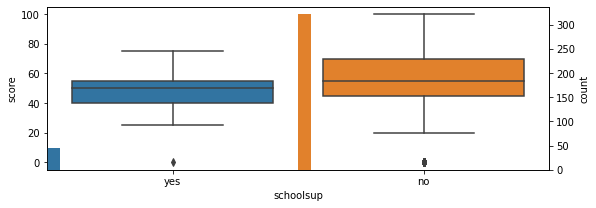

In [458]:
boxplot_distr('schoolsup', small=False)

# famsup

In [459]:
analis_column(stud, 'famsup')

Признак famsup имеет категориальные значения.
count     340
unique      2
top       yes
freq      208
Name: famsup, dtype: object
Распределение значений в %:
       famsup
yes  0.611765
no   0.388235
Средние значения баллов по значениям:
famsup
no     58.771186
yes    57.500000
Name: score, dtype: float64

Количество пустых строк: 36

Значения кол-во признака:
yes    208
no     132
Name: famsup, dtype: int64



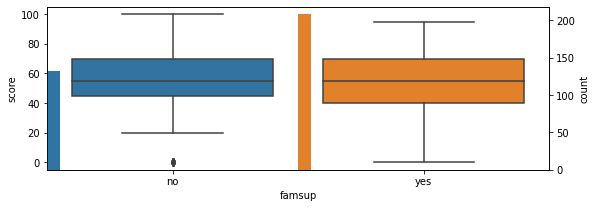

In [460]:
boxplot_distr('famsup', small=False)

# paid

In [461]:
analis_column(stud, 'paid')

Признак paid имеет категориальные значения.
count     337
unique      2
top        no
freq      188
Name: paid, dtype: object
Распределение значений в %:
         paid
no   0.557864
yes  0.442136
Средние значения баллов по значениям:
paid
no     58.734568
yes    57.992958
Name: score, dtype: float64

Количество пустых строк: 39

Значения кол-во признака:
no     188
yes    149
Name: paid, dtype: int64



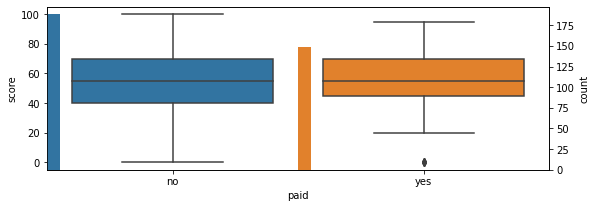

In [462]:
boxplot_distr('paid', small=False)

# activities

In [463]:
analis_column(stud, 'activities')

Признак activities имеет категориальные значения.
count     362
unique      2
top       yes
freq      188
Name: activities, dtype: object
Распределение значений в %:
     activities
yes    0.519337
no     0.480663
Средние значения баллов по значениям:
activities
no     57.312500
yes    58.988095
Name: score, dtype: float64

Количество пустых строк: 14

Значения кол-во признака:
yes    188
no     174
Name: activities, dtype: int64



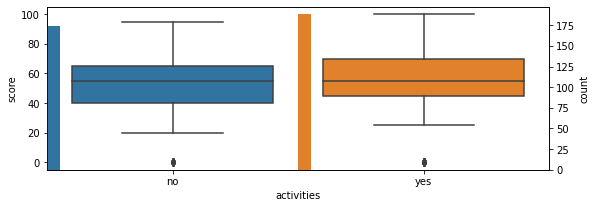

In [464]:
boxplot_distr('activities', small=False)

# nursery

In [465]:
analis_column(stud, 'nursery')

Признак nursery имеет категориальные значения.
count     361
unique      2
top       yes
freq      287
Name: nursery, dtype: object
Распределение значений в %:
      nursery
yes  0.795014
no   0.204986
Средние значения баллов по значениям:
nursery
no     57.307692
yes    58.060837
Name: score, dtype: float64

Количество пустых строк: 15

Значения кол-во признака:
yes    287
no      74
Name: nursery, dtype: int64



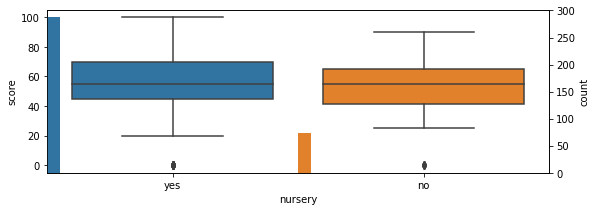

In [466]:
boxplot_distr('nursery', small=False)

# higher

In [467]:
analis_column(stud, 'higher')

Признак higher имеет категориальные значения.
count     356
unique      2
top       yes
freq      340
Name: higher, dtype: object
Распределение значений в %:
       higher
yes  0.955056
no   0.044944
Средние значения баллов по значениям:
higher
no     50.454545
yes    58.338710
Name: score, dtype: float64

Количество пустых строк: 20

Значения кол-во признака:
yes    340
no      16
Name: higher, dtype: int64



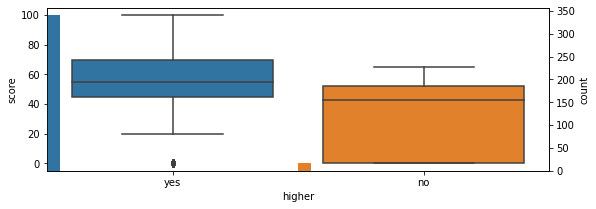

In [468]:
boxplot_distr('higher', small=False)

# internet

In [469]:
analis_column(stud, 'internet')

Признак internet имеет категориальные значения.
count     343
unique      2
top       yes
freq      290
Name: internet, dtype: object
Распределение значений в %:
     internet
yes  0.845481
no   0.154519
Средние значения баллов по значениям:
internet
no     55.851064
yes    58.428030
Name: score, dtype: float64

Количество пустых строк: 33

Значения кол-во признака:
yes    290
no      53
Name: internet, dtype: int64



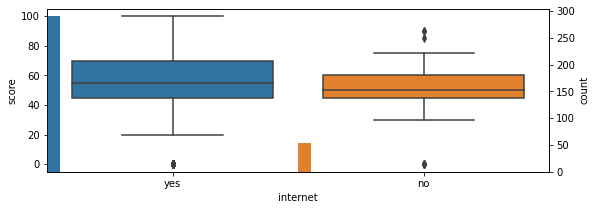

In [470]:
boxplot_distr('internet', small=False)

# romantic

In [471]:
analis_column(stud, 'romantic')

Признак romantic имеет категориальные значения.
count     346
unique      2
top        no
freq      228
Name: romantic, dtype: object
Распределение значений в %:
     romantic
no    0.65896
yes   0.34104
Средние значения баллов по значениям:
romantic
no     58.773585
yes    57.020202
Name: score, dtype: float64

Количество пустых строк: 30

Значения кол-во признака:
no     228
yes    118
Name: romantic, dtype: int64



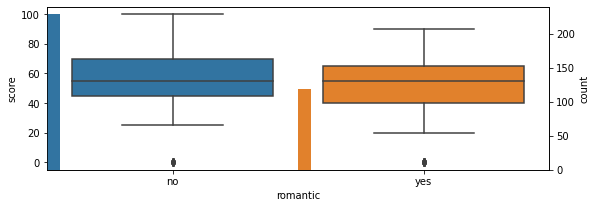

In [472]:
boxplot_distr('romantic', small=False)

# famrel

Признак famrel имеет числовые значения.

Распределение значений признака:
count    350.000000
mean       3.937143
std        0.893493
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
нижний квартиль: 4.0, верхний квартиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].

Количество пустых строк: 26

Значения кол-во признака:
4.0    174
5.0     92
3.0     61
2.0     16
1.0      7
Name: famrel, dtype: int64



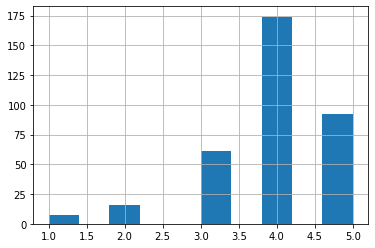

In [473]:
analis_column(stud, 'famrel')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


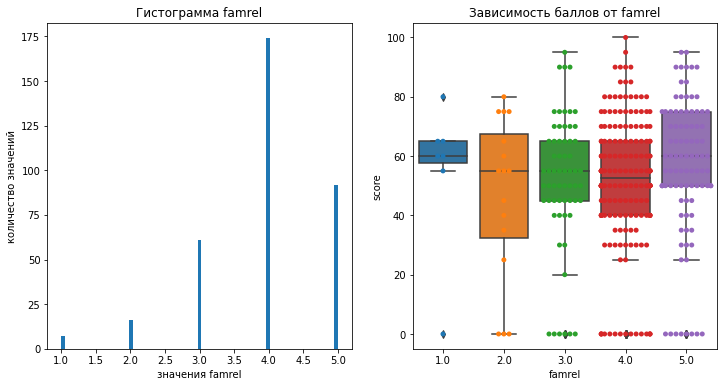

In [474]:
graf_chisl_perem('famrel')
sns.boxplot(x='famrel',y='score',data=stud)

# freetime

Признак freetime имеет числовые значения.

Распределение значений признака:
count    368.000000
mean       3.233696
std        0.981993
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
нижний квартиль: 3.0, верхний квартиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].

Количество пустых строк: 8

Значения кол-во признака:
3.0    147
4.0    109
2.0     61
5.0     35
1.0     16
Name: freetime, dtype: int64



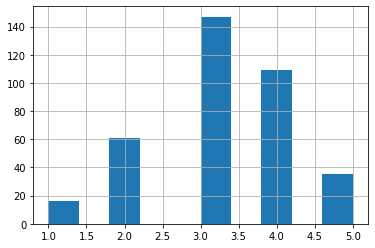

In [475]:
analis_column(stud, 'freetime')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


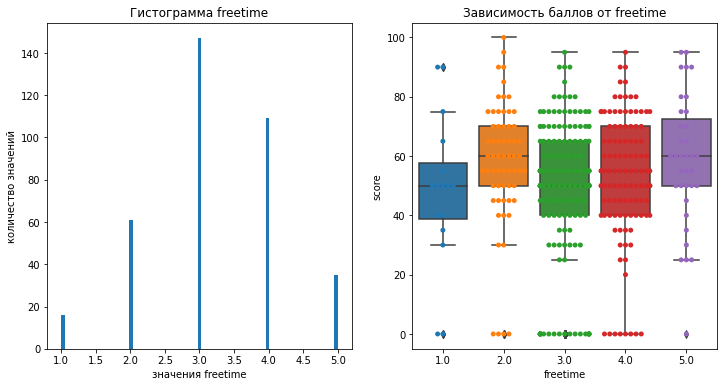

In [476]:
graf_chisl_perem('freetime')
sns.boxplot(x='freetime',y='score',data=stud)

# goout

Признак goout имеет числовые значения.

Распределение значений признака:
count    370.000000
mean       3.105405
std        1.110298
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
нижний квартиль: 2.0, верхний квартиль: 4.0, IQR: 2.0,  выбросов нет

Количество пустых строк: 6

Значения кол-во признака:
3.0    124
2.0     97
4.0     78
5.0     50
1.0     21
Name: goout, dtype: int64



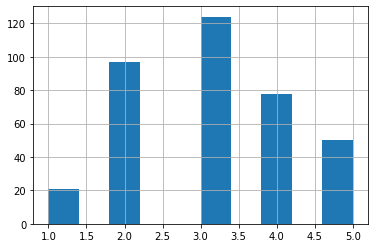

In [477]:
analis_column(stud, 'goout')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


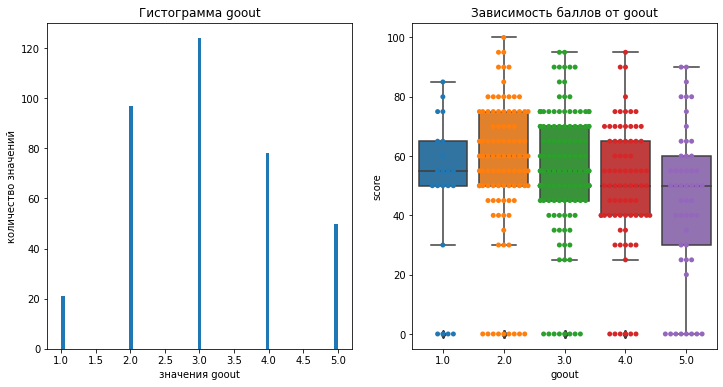

In [478]:
graf_chisl_perem('goout')
sns.boxplot(x='goout',y='score',data=stud)

# health

Признак health имеет числовые значения.

Распределение значений признака:
count    361.000000
mean       3.534626
std        1.400215
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
нижний квартиль: 3.0, верхний квартиль: 5.0, IQR: 2.0,  выбросов нет

Количество пустых строк: 15

Значения кол-во признака:
5.0    133
3.0     86
4.0     57
1.0     45
2.0     40
Name: health, dtype: int64



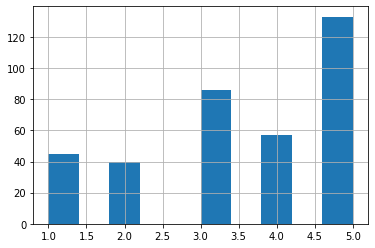

In [479]:
analis_column(stud, 'health')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


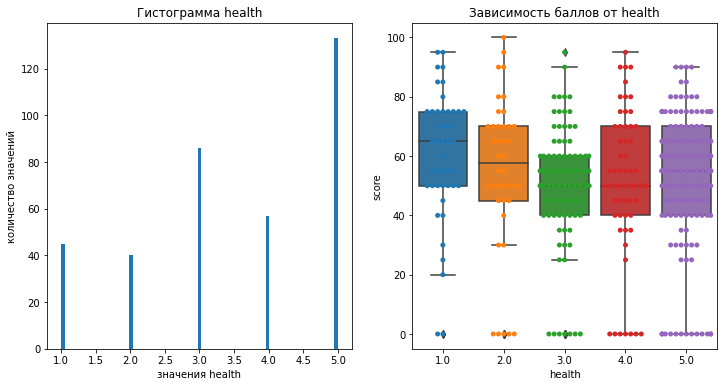

In [480]:
graf_chisl_perem('health')
sns.boxplot(x='health',y='score',data=stud)

# absences

Признак absences имеет числовые значения.

Распределение значений признака:
count    365.00000
mean       5.09863
std        5.87845
min        0.00000
25%        0.00000
50%        4.00000
75%        8.00000
max       30.00000
Name: absences, dtype: float64
нижний квартиль: 0.0, верхний квартиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].

Количество пустых строк: 11

Значения кол-во признака:
0.0     109
2.0      60
4.0      50
6.0      30
8.0      19
10.0     17
12.0     12
14.0     11
3.0       7
16.0      6
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
1.0       3
9.0       3
13.0      2
11.0      2
15.0      2
17.0      1
25.0      1
26.0      1
23.0      1
28.0      1
21.0      1
30.0      1
19.0      1
24.0      1
Name: absences, dtype: int64



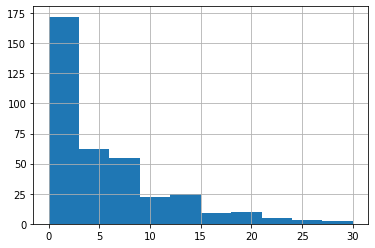

In [481]:

analis_column(stud, 'absences')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.0% of the points cannot be placed; y

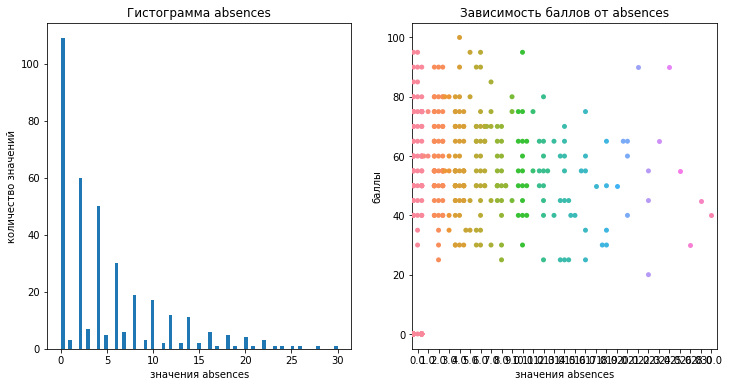

In [482]:
graf_chisl_perem('absences')


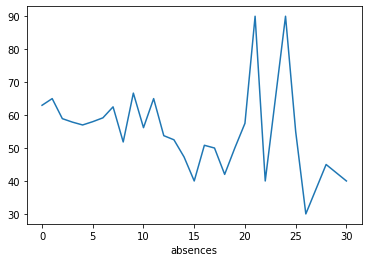

In [483]:
stud[stud.score >=10].groupby('absences')['score'].mean().plot()

Заметно снижение score с увеличение пропущенных занятий.
есть несколько "выбросов" пропущено больше 20 занятий, а балл score высокий.
Так же большая часть без пропусков получили 0
распределение среднего значения баллов по пропускам видно снижениеБ кроме двух исключений.

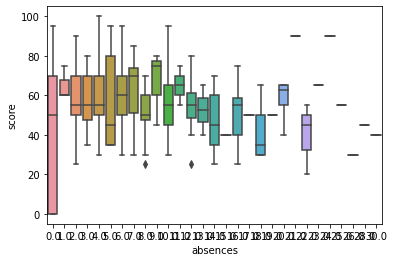

In [484]:
sns.boxplot(x='absences',y='score',data=stud)

# **score**

Признак score имеет числовые значения.

Распределение значений признака:
count    376.000000
mean      52.513298
std       23.018829
min        0.000000
25%       43.750000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
нижний квартиль: 42.5, верхний квартиль: 70.0, IQR: 27.5,  Границы выбросов: [1.25, 111.25].

Количество пустых строк: 0

Значения кол-во признака:
50.0     53
55.0     44
0.0      36
75.0     33
65.0     31
60.0     30
40.0     27
70.0     27
45.0     25
80.0     16
30.0     14
90.0     12
35.0      9
25.0      7
95.0      5
85.0      5
100.0     1
20.0      1
Name: score, dtype: int64



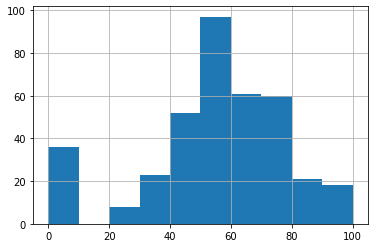

In [485]:
analis_column(stud, 'score')

In [486]:
len(stud[stud.score == 0].index) # нулевых значений

36

нижний квартиль: 43.75, верхний квартиль: 70.0, IQR межквартильный размах: 26.25,  Границы выбросов: [4.375, 109.375].


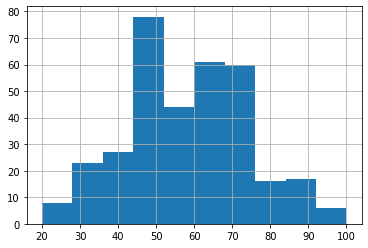

In [487]:
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
kvar25 = stud.score.quantile(0.25)
kvar75 = stud.score.quantile(0.75)
print('нижний квартиль: {},'.format(kvar25),
      'верхний квартиль: {},'.format(kvar75), 
      "IQR межквартильный размах: {}, ".format(IQR), 
      "Границы выбросов: [{f}, {l}].".format(f=kvar25 - 1.5*IQR, l=kvar75 + 1.5*IQR))


stud_score_plot = stud.score[stud.score.between(kvar25 - 1.5*IQR, kvar75 + 1.5*IQR)]
stud_score_plot.hist(bins = 10,label = 'IQR')

 Анализируя гистограмму, можно предположить, что ученики, у которых 0 баллов наверное не присутствовали на экзамене, это  не отражает знания по математике. иначе диапазон до 20 баллов был бы заполнен. Да и границы выброса у нас от 4 до 100.
На этом основании не будем брать значения 0 в рассмотрение при анализе баллов

In [488]:
numerical_columns = ['age', 'absences', 'score']


In [489]:
def get_stat_dif(column):
    """ 
    Функция проверяет статистически значимые различия колонок
    """
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
        break

In [490]:
# Проведем тест Стьюдента 
for col in stud :
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки score


Проанализируя все данные и гистограммы можно сказать что:

* В данных достаточно мало пропущенных значений, колонки age, sex и school были заполнены полностью;
* Выбросы найдены всего в нескольких столбцах, следовательно данные достаточно чистые;
* Пропущеных данных меньше 15%;
* Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, Medu, Fedu, Fjob, absences, address, schoolsup, paid, higher, romantic, freetime, failures, goout, famrel, studytime, heath;

